The dataset is "UNSW_2018_IoT_Botnet_Final_10_best" which is a benchmark dataset which created by UNSW.

There are 4 steps for the project:
1.analyzing  data
2.cleaning the data and visualizing the data
3.creating and evaluating models
The training model which are used in this project are GaussianNB,KNeighbors,ExtraTrees,RandomForest,DecisionTree

1.Analyzing data

In [1]:
'''
load the whole dataset to analyze
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
filePath=""
train_file=filePath+"UNSW_2018_IoT_Botnet_Final_10_best_Training.csv"
test_file=filePath+"UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv"
def load_data(train_file=train_file,test_file=test_file):
    '''
    load the dataset in two dataset variables:train_data,test_data
    input:train_file,test_file which are the names of these two files
    return:train_data,test_data
    '''
    train_data=pd.read_csv(train_file)
    test_data=pd.read_csv(test_file)
    return train_data,test_data
train_data,test_data=load_data(train_file,test_file)
#print the train data and test data information
train_data.shape,test_data.shape

((2934817, 19), (733705, 19))

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB


In [3]:
train_data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [4]:
test_data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP


In [5]:
train_data.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06,2.934817e+06
mean,1.834209e+06,1.212973e+05,8.869639e-01,8.254997e+01,1.017208e+00,3.134219e+00,2.230471e+00,9.245766e+01,4.303064e-01,3.128290e+00,3.019269e+00,9.998739e-01
std,1.059058e+06,7.578700e+04,8.036391e-01,2.439019e+01,1.483551e+00,1.187107e+00,1.517766e+00,1.816651e+01,5.623304e+01,7.845494e+02,1.860915e+00,1.122750e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171090e+05,5.484700e+04,2.999700e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819340e-01,1.000000e+02,0.000000e+00,1.558450e-01,2.804170e-01,1.000000e+00
50%,1.834316e+06,1.177370e+05,7.925750e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.689973e+00,1.000000e+02,0.000000e+00,2.837800e-01,4.008429e+00,1.000000e+00
75%,2.751250e+06,1.848700e+05,1.745220e+00,1.000000e+02,2.147949e+00,4.000000e+00,3.565061e+00,1.000000e+02,0.000000e+00,4.880000e-01,4.292426e+00,1.000000e+00
max,3.668522e+06,2.622110e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


In [6]:
#check whether any columns has null value
train_data.isna().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [7]:
#list all objects data type in train_data
objlist=[]
for e in train_data.columns:
    if train_data[e].dtype=="object":
        objlist.append(e)
        print(e)

proto
saddr
sport
daddr
dport
category
subcategory


In [8]:
#print all the valuce counts of train_data
import plotly.express as px
for e in objlist:
    print(f"{e} value counts:")
    t=train_data[e].value_counts()
    print(t)
    fig=px.bar(t,x=t.index,y=t.values,title=f"{e} value counts",labels={'index':'values','y':'counts'})
    fig.show()

proto value counts:
proto
udp          1596819
tcp          1330598
icmp            7228
arp              166
ipv6-icmp          6
Name: count, dtype: int64


saddr value counts:
saddr
192.168.100.147              761360
192.168.100.148              738642
192.168.100.150              712260
192.168.100.149              711466
192.168.100.3                  6609
192.168.100.5                  4107
192.168.100.6                   272
192.168.100.7                    34
192.168.100.4                    17
192.168.100.1                    14
192.168.100.27                    9
192.168.100.46                    8
fe80::250:56ff:febe:254           5
192.168.100.55                    3
fe80::2c6a:ff9b:7e14:166a         2
fe80::250:56ff:febe:c038          2
fe80::c0c0:aa20:45b9:bdd9         2
fe80::250:56ff:febe:89ee          2
fe80::250:56ff:febe:26db          2
fe80::250:56ff:febe:e9d9          1
Name: count, dtype: int64


sport value counts:
sport
0x0303    7156
80        3220
1822       878
60541      869
1216       868
          ... 
39364       31
18992       30
39305       30
0x000d      10
0x0011       8
Name: count, Length: 65541, dtype: int64


daddr value counts:
daddr
192.168.100.3      1900562
192.168.100.5       361192
192.168.100.7       332161
192.168.100.6       329679
192.168.100.150       3040
                    ...   
205.251.199.148          1
192.33.14.30             1
192.55.83.30             1
205.251.194.201          1
205.251.198.119          1
Name: count, Length: 81, dtype: int64


dport value counts:
dport
80       2858794
1           5379
3306        3757
53           275
-1           166
          ...   
40344          1
3754           1
6459           1
26822          1
61804          1
Name: count, Length: 6906, dtype: int64


category value counts:
category
DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: count, dtype: int64


subcategory value counts:
subcategory
UDP                  1584650
TCP                  1274843
Service_Scan           58626
OS_Fingerprint         14293
HTTP                    1970
Normal                   370
Keylogging                59
Data_Exfiltration          6
Name: count, dtype: int64


2.cleaning the data and visualizing the data

In [9]:
def dealCategory(dataset):
    '''
    merge the category and subcategory columns into one columns as all_category
    '''
    dataset["all_category"]=dataset["category"]+"_"+dataset["subcategory"]
    delcol=["category","subcategory"]
    dataset.drop(delcol,axis=1,inplace=True)
dealCategory(train_data)
dealCategory(test_data)
train_data.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,all_category
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS_UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS_TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS_TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS_UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS_UDP


In [10]:
all_category=train_data['all_category'].unique()
all_category

array(['DDoS_UDP', 'DDoS_TCP', 'DoS_UDP', 'DoS_TCP',
       'Reconnaissance_OS_Fingerprint', 'Reconnaissance_Service_Scan',
       'DoS_HTTP', 'Normal_Normal', 'DDoS_HTTP', 'Theft_Keylogging',
       'Theft_Data_Exfiltration'], dtype=object)

In [11]:
train_data.groupby('all_category').agg(len)

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
all_category,,,,,,,,,,,,,,,,,
DDoS_HTTP,786,786,786,786,786,786,786,786,786,786,786,786,786,786,786,786,786
DDoS_TCP,782228,782228,782228,782228,782228,782228,782228,782228,782228,782228,782228,782228,782228,782228,782228,782228,782228
DDoS_UDP,758301,758301,758301,758301,758301,758301,758301,758301,758301,758301,758301,758301,758301,758301,758301,758301,758301
DoS_HTTP,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184,1184
DoS_TCP,492615,492615,492615,492615,492615,492615,492615,492615,492615,492615,492615,492615,492615,492615,492615,492615,492615
DoS_UDP,826349,826349,826349,826349,826349,826349,826349,826349,826349,826349,826349,826349,826349,826349,826349,826349,826349
Normal_Normal,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370
Reconnaissance_OS_Fingerprint,14293,14293,14293,14293,14293,14293,14293,14293,14293,14293,14293,14293,14293,14293,14293,14293,14293
Reconnaissance_Service_Scan,58626,58626,58626,58626,58626,58626,58626,58626,58626,58626,58626,58626,58626,58626,58626,58626,58626


In [12]:
from sklearn.preprocessing import LabelEncoder
def dealLabel(dataset,columns):
    '''
    change category columns into numeric with LabelEncoder
    '''
    for col in columns:
        l_encoder=LabelEncoder()
        dataset[col]=l_encoder.fit_transform(dataset[col])
cols=["proto","saddr","sport","daddr","dport","N_IN_Conn_P_SrcIP","N_IN_Conn_P_DstIP","all_category"]
dealLabel(train_data,cols)
dealLabel(test_data,cols)
train_data.head()


,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,all_category
0,3142762,4,4,61685,15,6014,251984,1.900363,99,0.000000,4,2.687519,99,0.0,0.494549,4.031619,1,2
1,2432264,3,4,50363,15,6014,256724,0.078003,37,3.856930,3,3.934927,99,0.0,0.256493,4.012924,1,1
2,1976315,3,1,19080,15,6014,62921,0.268666,99,2.974100,3,3.341429,99,0.0,0.294880,3.609205,1,1
3,1240757,4,4,43028,15,6014,99168,1.823185,62,0.000000,4,3.222832,62,0.0,0.461435,4.942302,1,5
4,3257991,4,1,13854,15,6014,105063,0.822418,99,2.979995,4,3.983222,99,0.0,1.002999,4.994452,1,2


In [13]:
'''
delet useless columns
'''
def delCol(dataset,columns):
    dataset.drop(columns,axis=1,inplace=True)
#delete pkSeqID and seq columns from the training dataset and testing dataset
cols=["pkSeqID","seq"]
delCol(train_data,cols)
delCol(test_data,cols)
train_data.head()

,proto,saddr,sport,daddr,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,all_category
0,4,4,61685,15,6014,1.900363,99,0.000000,4,2.687519,99,0.0,0.494549,4.031619,1,2
1,3,4,50363,15,6014,0.078003,37,3.856930,3,3.934927,99,0.0,0.256493,4.012924,1,1
2,3,1,19080,15,6014,0.268666,99,2.974100,3,3.341429,99,0.0,0.294880,3.609205,1,1
3,4,4,43028,15,6014,1.823185,62,0.000000,4,3.222832,62,0.0,0.461435,4.942302,1,5
4,4,1,13854,15,6014,0.822418,99,2.979995,4,3.983222,99,0.0,1.002999,4.994452,1,2


In [14]:
#correlation between columns
train_corr=train_data.corr()
train_corr

,proto,saddr,sport,daddr,dport,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,all_category
proto,1.000000,-0.046587,0.022237,0.124857,0.196314,0.402588,0.081553,0.340265,0.757065,0.700617,0.011933,-0.007970,-0.001429,0.683593,0.001798,0.292640
saddr,-0.046587,1.000000,-0.007716,-0.441474,-0.120402,0.028844,-0.038566,-0.048835,-0.041389,0.017445,-0.074670,0.002816,0.000933,0.004636,-0.025591,0.057405
sport,0.022237,-0.007716,1.000000,0.005806,0.023015,-0.012726,-0.002478,0.032003,-0.011675,0.018182,0.013226,-0.003348,0.002037,0.012105,-0.000731,0.001886
daddr,0.124857,-0.441474,0.005806,1.000000,0.076641,-0.066621,0.044865,-0.142168,0.137393,-0.207726,-0.259685,-0.002010,0.031414,-0.165146,-0.149041,0.576427
dport,0.196314,-0.120402,0.023015,0.076641,1.000000,0.148351,0.135742,0.089230,0.072028,0.194808,0.120489,-0.018873,-0.010720,0.215721,0.040718,-0.352456
stddev,0.402588,0.028844,-0.012726,-0.066621,0.148351,1.000000,0.041382,-0.375931,0.339865,0.350581,0.040469,-0.008364,-0.003818,0.668193,0.011872,-0.006871
N_IN_Conn_P_SrcIP,0.081553,-0.038566,-0.002478,0.044865,0.135742,0.041382,1.000000,0.028413,0.036031,0.061703,0.575716,-0.008289,-0.005509,0.065151,0.028637,0.004918
min,0.340265,-0.048835,0.032003,-0.142168,0.089230,-0.375931,0.028413,1.000000,0.275102,0.694039,0.103538,-0.005078,-0.002126,0.427138,0.005226,-0.106774
state_number,0.757065,-0.041389,-0.011675,0.137393,0.072028,0.339865,0.036031,0.275102,1.000000,0.571467,-0.047885,-0.003675,-0.004353,0.565148,0.002701,0.252055
mean,0.700617,0.017445,0.018182,-0.207726,0.194808,0.350581,0.061703,0.694039,0.571467,1.000000,0.120107,-0.011026,-0.004828,0.908659,0.012848,-0.060934


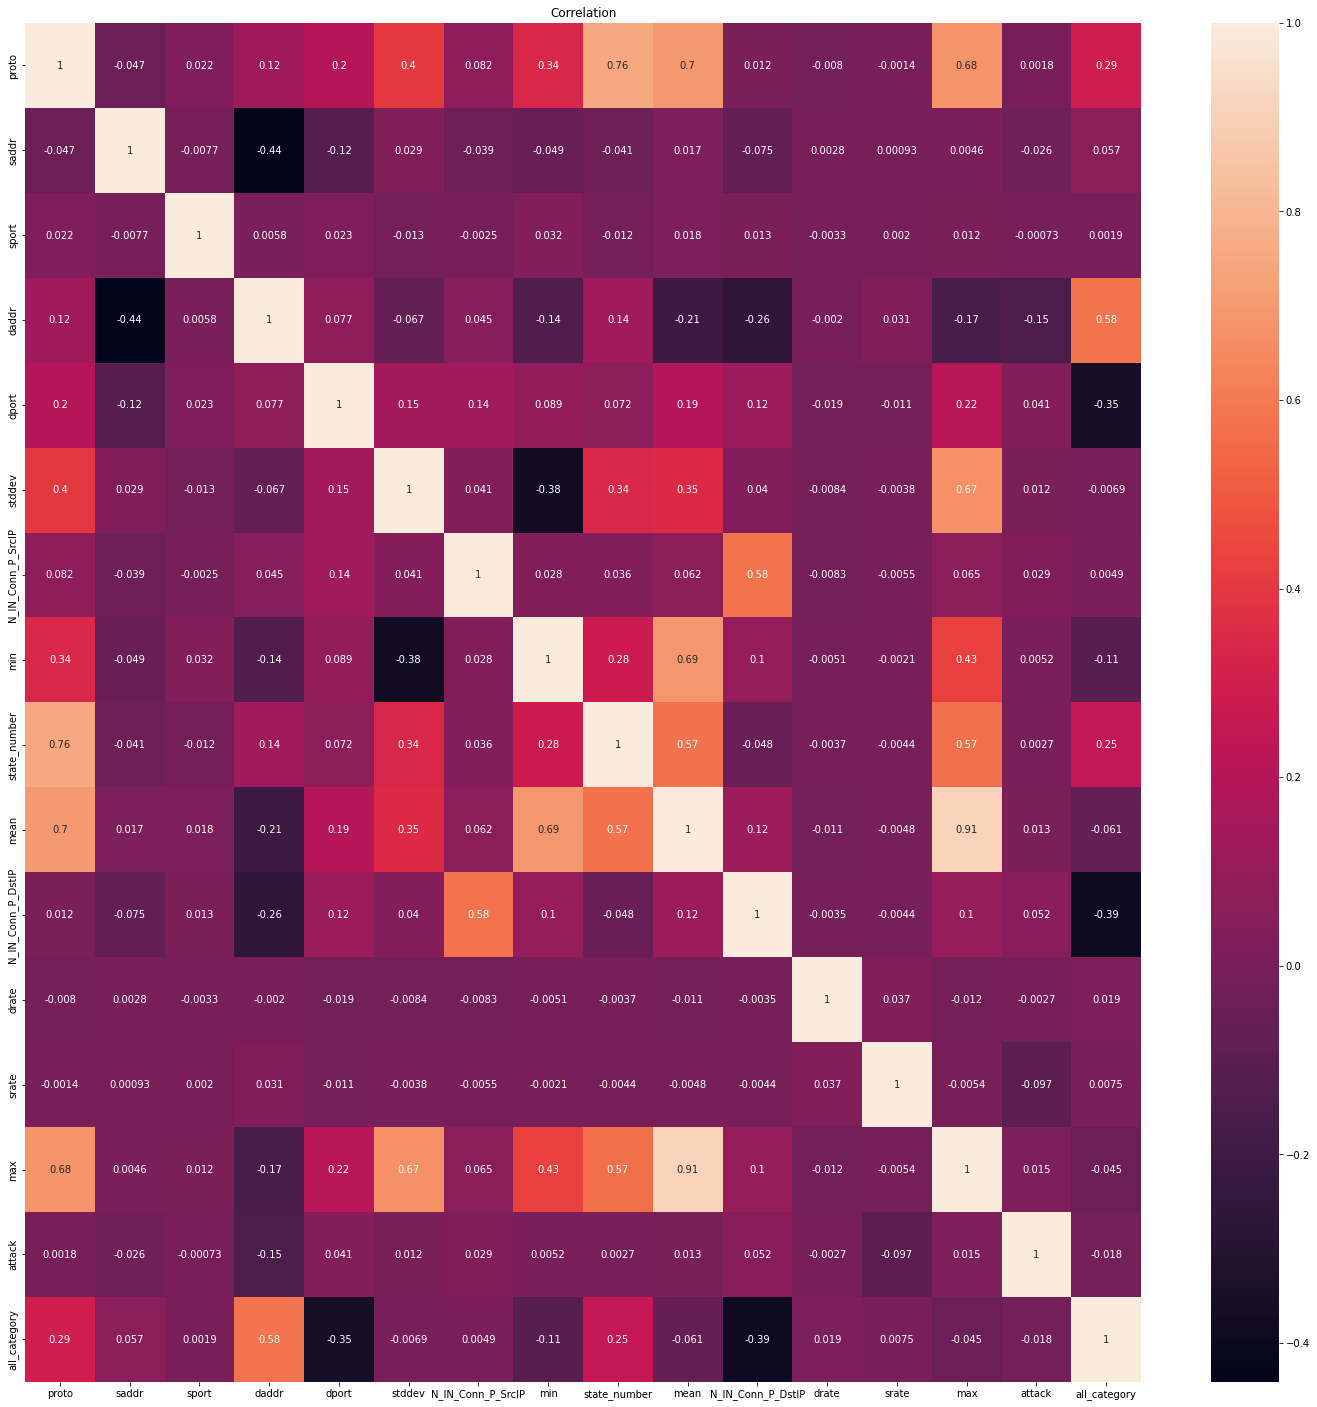

In [15]:
plt.figure(figsize=(25,25))
sns.heatmap(train_corr,annot=True);
plt.title("Correlation");

In [16]:
#sort the correlaitons with all_category column
train_corr_all_category=train_corr["all_category"].sort_values()
train_corr_all_category

N_IN_Conn_P_DstIP   -0.394319
dport               -0.352456
min                 -0.106774
mean                -0.060934
max                 -0.045007
attack              -0.018472
stddev              -0.006871
sport                0.001886
N_IN_Conn_P_SrcIP    0.004918
srate                0.007498
drate                0.019431
saddr                0.057405
state_number         0.252055
proto                0.292640
daddr                0.576427
all_category         1.000000
Name: all_category, dtype: float64

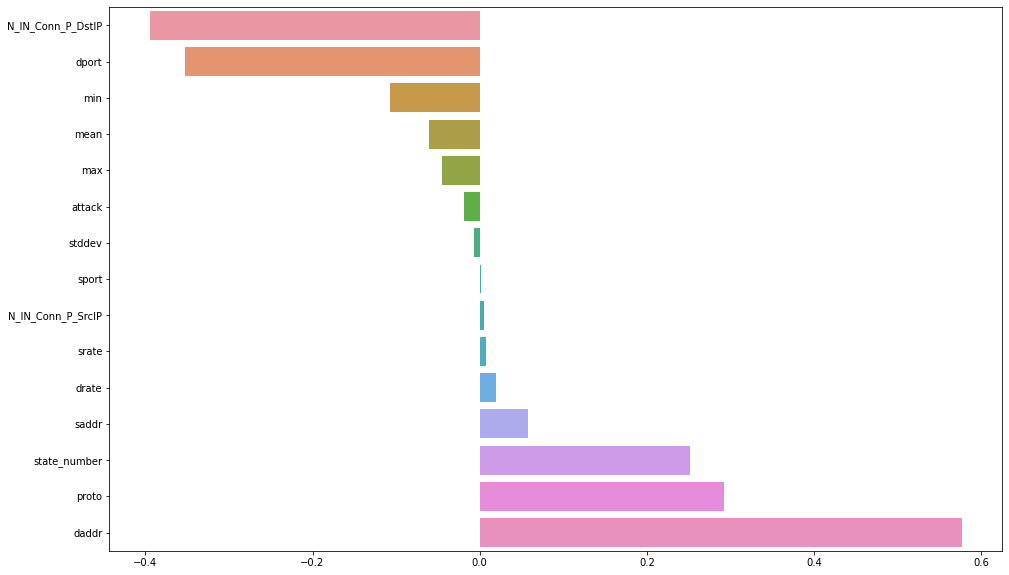

In [17]:
#show the feature importance
train_corr_all_category.drop("all_category",axis=0,inplace=True)
plt.figure(figsize=(16,10))
sns.barplot(x=train_corr_all_category.values,y=train_corr_all_category.index);

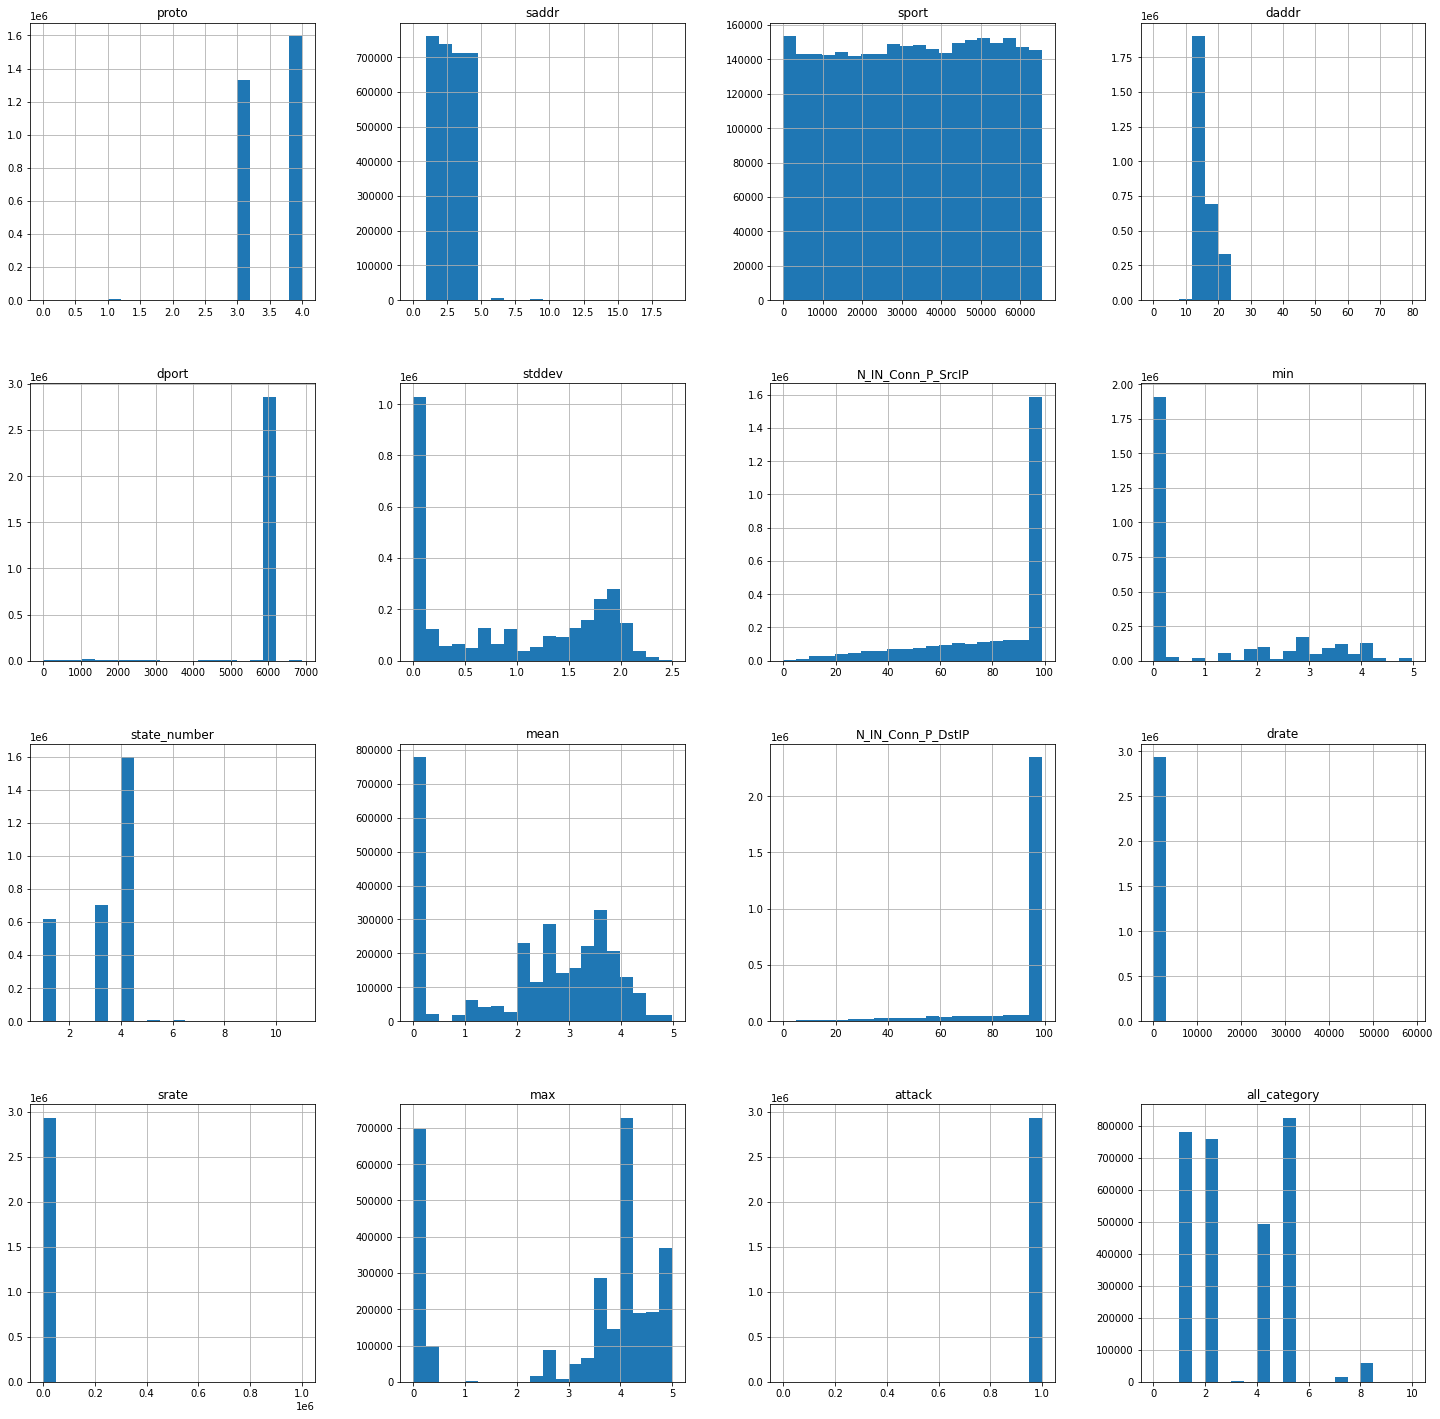

In [18]:
fig, ax = plt.subplots(figsize=(25, 25))
train_data.hist(bins=20,ax=ax);

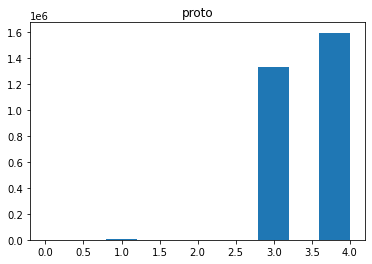

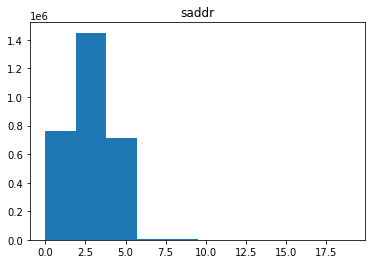

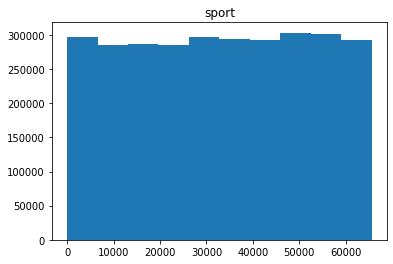

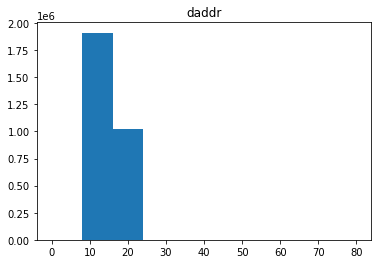

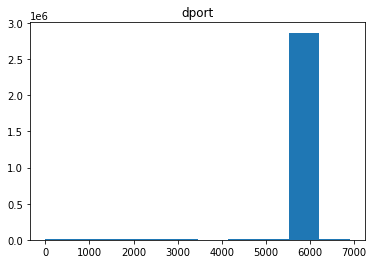

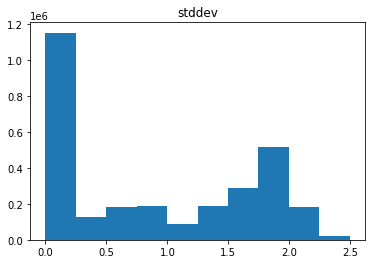

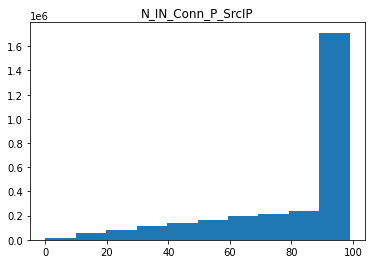

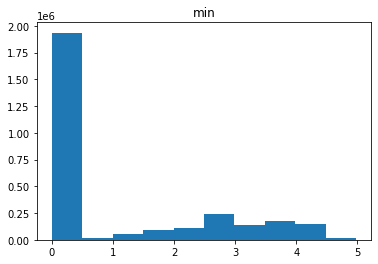

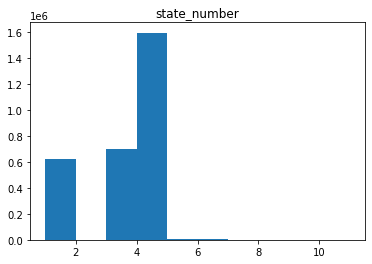

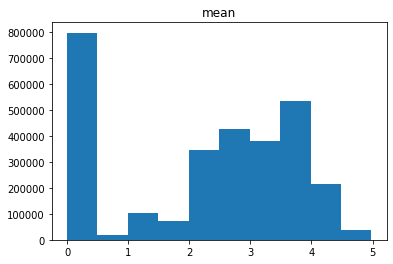

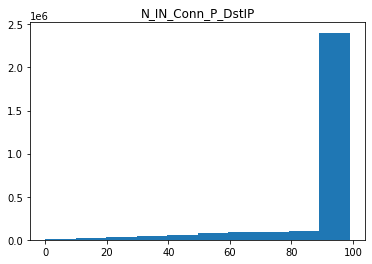

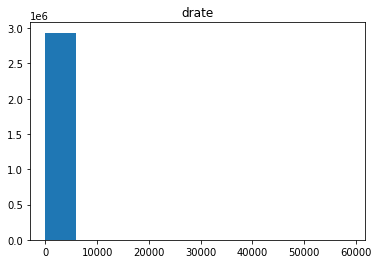

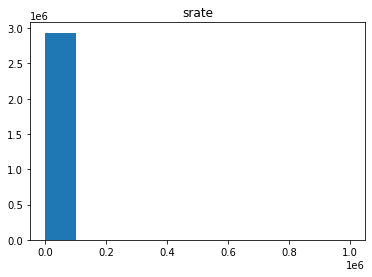

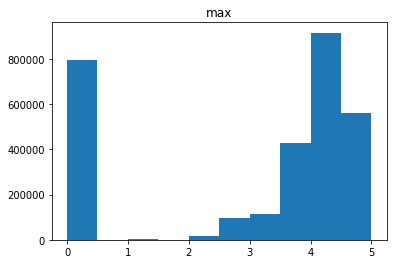

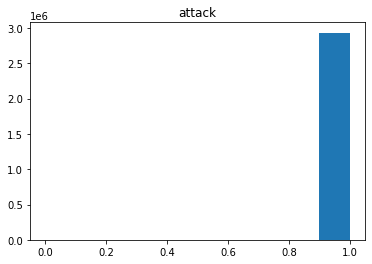

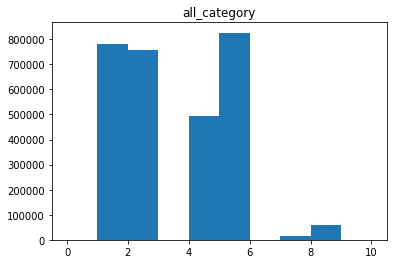

In [19]:
#draw the hist of each columns
for e in train_data.columns:
    plt.subplot()
    plt.hist(train_data[e])
    plt.title(e)
    plt.show()


In [20]:
y=train_data["all_category"]
X=train_data.drop(["all_category"],axis=1,inplace=False)
X.shape,y.shape

((2934817, 15), (2934817,))

In [21]:
#normalized the data in X
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X_scaled=sd.fit_transform(X)

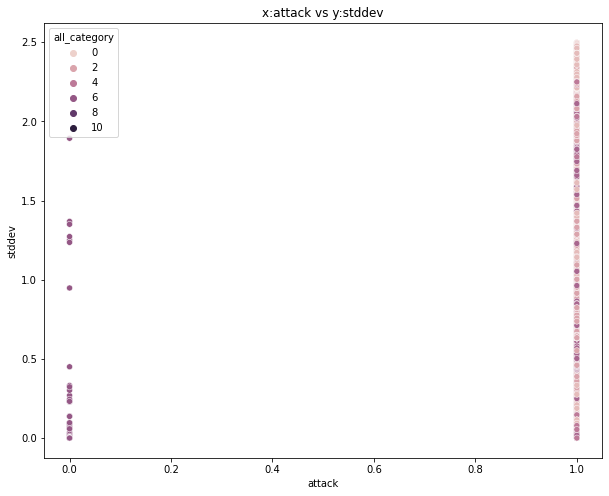

In [23]:
def showscatter(df,x,y,hue):
  plt.figure(figsize=(10,8))
  sns.scatterplot(df,x=x,y=y,hue=hue)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(f"x:{x} vs y:{y}")
  plt.show()
features_list=["attack","stddev","max"]
labels_name="all_category"
title_scatter="attack vs stddev"
showscatter(train_data,x=features_list[0],y=features_list[1],hue=labels_name)


3.creating and evaluating models

In [24]:
X_train=X_scaled
y_train=y
y_test=test_data["all_category"]
X_test=test_data.drop(["all_category"],axis=1,inplace=False)
X_test=sd.fit_transform(X_test)


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [26]:
import time
class T_Timer():
    '''
    T_Timer is used to get the running time
    '''
    def start_timer(self):
        '''
        Timer starts
        '''
        self.startTime=time.time()
    def end_timer(self):
        '''
        Timer ends
        '''
        self.endTime=time.time()
    def get_time(self):
        '''
        get time from start time to end time 
        '''
        return self.endTime-self.startTime


In [28]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
%timeit
t_Timer=T_Timer()
results=[]
def model_result(model,model_name):
    m_result={}
    m_result['model_name']=model_name
    m_model=model
    t_Timer.start_timer()
    m_model.fit(X_train,y_train)
    t_Timer.end_timer()
    train_time=t_Timer.get_time()
    y_pred=m_model.predict(X_test)
    m_result['accuracy']=accuracy_score(y_true=y_test,y_pred=y_pred)
    m_result['f1_score']=f1_score(y_true=y_test,y_pred=y_pred,average='weighted')
    m_result['precision']=precision_score(y_true=y_test,y_pred=y_pred,average='weighted')
    m_result['recall']=recall_score(y_true=y_test,y_pred=y_pred,average='weighted')
    m_result['training_time']=train_time
    results.append(m_result)
def get_all_result():
    gnb_model=GaussianNB(var_smoothing=1e-06)
    model_result(gnb_model,"GaussianNB")
    knn_model=KNeighborsClassifier(n_neighbors=3,weights='distance')
    model_result(knn_model,"KNeighborsClassifier")
    extra_tree_model=ExtraTreesClassifier(criterion='gini',max_depth=40,min_samples_leaf=1,min_samples_split=2)
    model_result(extra_tree_model,"ExtraTreesClassifier")
    rfc_model=RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
    model_result(rfc_model,"RandomForestClassifier")
    decision_tree_model=DecisionTreeClassifier(criterion='entropy',max_depth=None,min_samples_leaf=1,min_samples_split=2)
    model_result(decision_tree_model,"DecisionTreeClassifier")
    df_results=pd.DataFrame(results)
    return df_results
df_results=get_all_result()
try:
    df_results=df_results.set_index('model_name')
except:
    print("model_name is not in the dataframe columns.")
df_results

,accuracy,f1_score,precision,recall,training_time
model_name,,,,,
GaussianNB,0.926699,0.927937,0.936380,0.926699,0.714514
KNeighborsClassifier,0.999245,0.999246,0.999249,0.999245,7.364219
ExtraTreesClassifier,0.987837,0.988859,0.991360,0.987837,117.699099
RandomForestClassifier,0.875528,0.894088,0.971478,0.875528,230.487860
DecisionTreeClassifier,0.718901,0.729638,0.845910,0.718901,11.472501


In [39]:
#dispaly the accuracy,f1 sorce,precision and recall of the result
import plotly.graph_objects as go
fig=go.Figure(data=[
    go.Bar(name='accuracy',x=df_results.index,y=df_results['accuracy']),
    go.Bar(name='f1_score',x=df_results.index,y=df_results['f1_score']),
    go.Bar(name='precision',x=df_results.index,y=df_results['precision']),
    go.Bar(name='recall',x=df_results.index,y=df_results['recall'])
])
fig.update_layout(barmode='group')
fig.show()

In [41]:
px.bar(df_results,x=df_results.index,y=df_results['training_time'],color=df_results.index)

From the result,KNeighborsClassifier is the best result with the second shortest time.The detail information about the model is displayed.

Tools:
1.python:https://www.python.org/
2.scikit-learn:https://scikit-learn.org/stable/
3.seaborn:https://seaborn.pydata.org/
4.plotly:https://plotly.com/python/
5.matplotlib:https://matplotlib.org/stable/index.html